In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [91]:
# load all of the datasets
test_values = pd.read_csv("~/Github/driven_data/Pump It Up/data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
train_labels = pd.read_csv("~/Github/driven_data/Pump It Up/data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
train_values = pd.read_csv("~/Github/driven_data/Pump It Up/data/4910797b-ee55-40a7-8668-10efd5c1b960.csv")

In [92]:
# column_labels.remove("id")
# column_labels.remove("amount_tsh")
# column_labels.remove("date_recorded")
# column_labels.remove("funder")
# column_labels.remove("gps_height")
# column_labels.remove("installer")
# column_labels.remove("longitude")
# column_labels.remove("latitude")
# column_labels.remove("wpt_name")
# column_labels.remove("num_private")
# column_labels.remove("basin")
# column_labels.remove("subvillage")
# column_labels.remove("region")
# column_labels.remove("region_code")
# column_labels.remove("district_code")
# column_labels.remove("lga")
# column_labels.remove("ward")
# column_labels.remove("population")
# column_labels.remove("public_meeting")
# column_labels.remove("recorded_by")
# column_labels.remove("scheme_management")
# column_labels.remove("scheme_name")
# column_labels.remove("permit")
# column_labels.remove("construction_year")
# column_labels.remove("extraction_type")
# column_labels.remove("extraction_type_group")
# column_labels.remove("extraction_type_class")
# column_labels.remove("management")
# column_labels.remove("management_group")
# column_labels.remove("payment")
# column_labels.remove("payment_type")
# column_labels.remove("water_quality")
# column_labels.remove("quality_group")
# column_labels.remove("quantity")
# column_labels.remove("quantity_group")
# column_labels.remove("source")
# column_labels.remove("source_type")
# column_labels.remove("source_class")
# column_labels.remove("waterpoint_type")
# column_labels.remove("waterpoint_type_group")

In [93]:
# preprocess the labels
column_labels = list(train_labels.columns.values)
column_labels.remove("id")

for i in column_labels:
    unique_value = train_labels[i].unique()
    size = len(unique_value)
    print(size)
    for j in range(size):
        if unique_value[j] != "nan":
            train_labels.loc[train_labels[i] == unique_value[j], i] = j
            


3


In [94]:
# preprocess the values
column_labels = list(train_values.columns.values)
column_labels.remove("id")
column_labels.remove("amount_tsh")
column_labels.remove("date_recorded")
column_labels.remove("funder")
column_labels.remove("gps_height")
column_labels.remove("longitude")
column_labels.remove("latitude")
column_labels.remove("wpt_name")
column_labels.remove("num_private")
# column_labels.remove('subvillage')
column_labels.remove('region')
column_labels.remove("region_code")
column_labels.remove("district_code")
column_labels.remove("population")
column_labels.remove("recorded_by")
column_labels.remove("construction_year")
# column_labels.remove('extraction_type')
# column_labels.remove('extraction_type_group')
# column_labels.remove('payment')
# column_labels.remove('water_quality')
# column_labels.remove('quantity')
# column_labels.remove('source')
# column_labels.remove('source_type')
# column_labels.remove('waterpoint_type')


test_values = test_values.fillna(test_values.median())

for i in column_labels:
    unique_value = list(set(np.concatenate((train_values[i].unique() , test_values[i].unique()))))
    size = len(unique_value)
    print(i, size)
    for j in range(size):
        if unique_value[j] != "nan":
            train_values.loc[train_values[i] == unique_value[j], i] = j
            test_values.loc[test_values[i] == unique_value[j], i] = j

"""for col in [
'amount_tsh',
'gps_height',
'longitude',
'population', 
'construction_year' ]:
    for df in [train_values, test_values]:
        mean_value = df[col].mean(skipna=True)
        df[col] = df[col].mask(df[col] == 0, mean_value)
    """
train_values = train_values.fillna(train_values.median())
test_values = test_values.fillna(test_values.median())

installer 2411
basin 9
subvillage 21426
lga 125
ward 2098
public_meeting 3
scheme_management 13
scheme_name 2869
permit 3
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
quantity_group 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6


In [103]:
column_labels = list(train_values.columns.values)
column_labels = list(train_values.columns.values)
column_labels.remove("id")
column_labels.remove("date_recorded")
column_labels.remove("funder")
column_labels.remove("wpt_name")
column_labels.remove('subvillage')
column_labels.remove('region')
column_labels.remove("recorded_by")
# column_labels.remove('extraction_type')
# column_labels.remove('extraction_type_group')
column_labels.remove('payment')
# column_labels.remove('water_quality')
# column_labels.remove('quantity')
# column_labels.remove('source')
# column_labels.remove('source_type')
# column_labels.remove('waterpoint_type')
status_group = ["functional", "non functional", "functional needs repair"]

In [104]:
clf = RandomForestClassifier(n_estimators= 200, n_jobs= -1)

In [105]:
X = train_values[column_labels]
y = train_labels['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
accuracy = accuracy_score(clf.predict(X_test), y_test)
print("Tree Score: {}".format(tree_score))
# 80.1% with adding mean to 0

Tree Score: 0.8016835016835017


In [59]:
clf.fit(train_values[column_labels], train_labels['status_group'])
clf.predict(test_values[column_labels])

array([1, 0, 0, ..., 0, 0, 1])

In [60]:
test_values['predict'] = clf.predict(test_values[column_labels])
test_values['status_group'] = test_values['predict'].apply(lambda x: status_group[x])

In [61]:
test_values[['id', 'status_group']].to_csv('submission.csv',index = False)

In [62]:
test_values['construction_year'].unique()

array([2012, 2000, 2010, 1987, 1990, 2007, 1982, 1997, 2003, 2006, 2002,
          0, 1984, 1989, 1978, 2008, 2005, 1970, 2009, 1998, 1971, 1972,
       1983, 1974, 1992, 1999, 2004, 2011, 1988, 1962, 1986, 1985, 1969,
       1996, 1994, 1960, 1975, 1981, 1995, 1963, 1977, 2001, 1993, 1991,
       1976, 1980, 2013, 1979, 1967, 1973, 1968, 1965, 1961, 1966, 1964])

In [115]:
print(clf.decision_path(train_values[column_labels]))

(<59400x3395438 sparse matrix of type '<class 'numpy.int64'>'
	with 222234298 stored elements in Compressed Sparse Row format>, array([      0,   16849,   33864,   50985,   68234,   85213,  102338,
        118859,  135918,  152599,  169766,  186831,  203702,  220727,
        237664,  254353,  271206,  288559,  305288,  322077,  339184,
        355993,  372966,  389881,  406646,  423725,  440660,  457851,
        474920,  491759,  508598,  525509,  542432,  559511,  576692,
        593611,  610680,  627669,  644730,  661649,  678764,  695853,
        712954,  729937,  746690,  763477,  780452,  797355,  814592,
        831413,  848402,  865429,  882494,  899435,  916342,  933413,
        950586,  967673,  984818, 1001597, 1018684, 1035847, 1052990,
       1070121, 1086804, 1103935, 1120734, 1137677, 1154572, 1171607,
       1188672, 1205671, 1222598, 1239675, 1256528, 1273341, 1290176,
       1307155, 1324224, 1341375, 1358348, 1375535, 1392506, 1409459,
       1426700, 1443411, 1460590

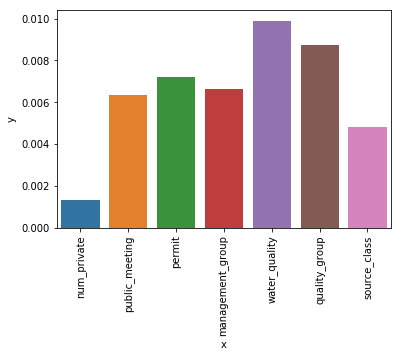

In [138]:
df = pd.DataFrame({'x':column_labels, 'y':clf.feature_importances_})
sns.barplot(x = 'x', y = 'y', data = df[df['y'] < .01])
plt.xticks(rotation = 90)
plt.show()

In [131]:
df.head()

,x,y
0,amount_tsh,0.025046
1,gps_height,0.060927
2,installer,0.035871
3,longitude,0.120731
4,latitude,0.119749


In [139]:
import gc
gc?